In [ ]:
#loading dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [ ]:
calories_data = pd.read_csv('/content/calories.csv')

calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
merged_df = pd.merge(exercise_data, calories_data, on='User_ID', how='inner')

merged_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
merged_df.shape

(15000, 9)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
merged_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
merged_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


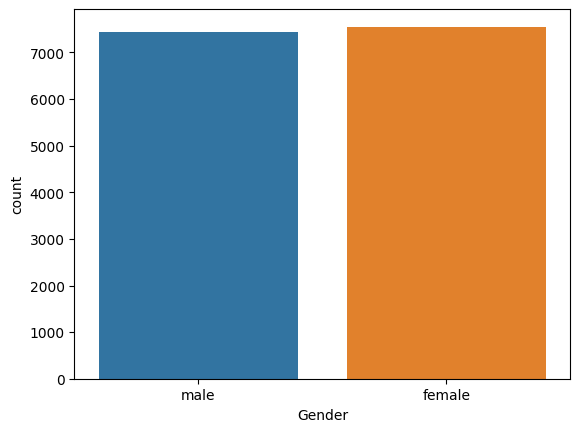

In [ ]:
# plotting a count plot for gender to see the distribution

sns.countplot(x='Gender', data=merged_df)
plt.show()


In [ ]:
merged_df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

<ipython-input-11-3e6d55bed128>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Age'])


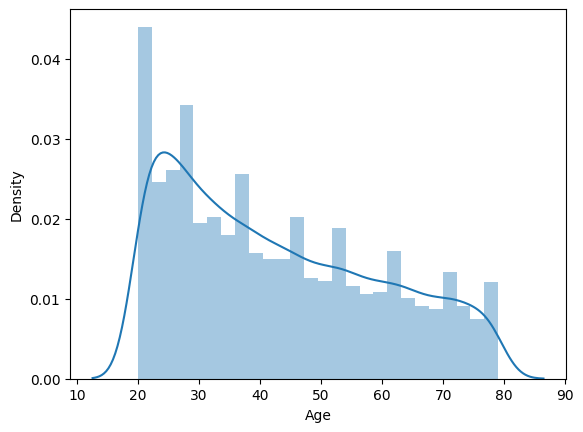

In [ ]:
# distribution of Age column

sns.distplot(merged_df['Age'])
plt.show()

Finding correlation in the dataset

<ipython-input-12-08cabdd582dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merged_df.corr()


<Axes: >

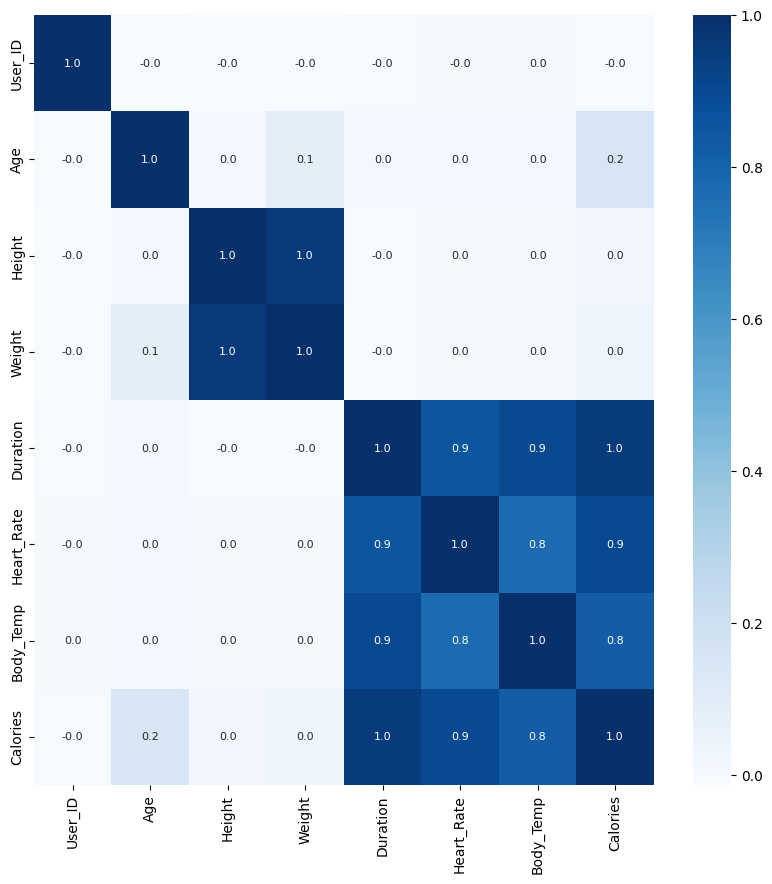

In [ ]:
#constructing a heatmap
correlation = merged_df.corr()

plt.figure(figsize=(10,10))

sns.heatmap(correlation, cbar=True, fmt ='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

One hot encoding for the Gender column
-male - 0
  female - 1

In [ ]:

marged_encoded = pd.get_dummies(merged_df, columns=['Gender'], prefix='Gender')




In [ ]:
df = pd.get_dummies(merged_df, columns=['Gender'], prefix='Gender', drop_first=True)


In [ ]:
df

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0
...,...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0,0
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0,0
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0,0
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0,1


In [ ]:
df_encoded = df.rename(columns={'Gender_male': 'Gender'})

In [ ]:
df_encoded

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0
...,...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0,0
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0,0
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0,0
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0,1


In [ ]:
calories_df0 = df_encoded

calories_df0

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0
...,...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0,0
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0,0
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0,0
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0,1


Seperating features and Target

In [ ]:
X = calories_df0.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_df0['Calories']

In [ ]:
print(X)


       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender
0       68   190.0    94.0      29.0       105.0       40.8       1
1       20   166.0    60.0      14.0        94.0       40.3       0
2       69   179.0    79.0       5.0        88.0       38.7       1
3       34   179.0    71.0      13.0       100.0       40.5       0
4       27   154.0    58.0      10.0        81.0       39.8       0
...    ...     ...     ...       ...         ...        ...     ...
14995   20   193.0    86.0      11.0        92.0       40.4       0
14996   27   165.0    65.0       6.0        85.0       39.2       0
14997   43   159.0    58.0      16.0        90.0       40.1       0
14998   78   193.0    97.0       2.0        84.0       38.3       1
14999   63   173.0    79.0      18.0        92.0       40.5       1

[15000 rows x 7 columns]
['Calories']


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Slitting data into test and train data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [ ]:
print(X.shape)

print(X_train.shape)

print(X_test.shape)

(15000, 7)
(12000, 7)
(3000, 7)


Model Training

XGBoost Regressor

In [ ]:
#loading the model

model = XGBRegressor()

In [ ]:
#training the model with the X_train

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation of model

Prediction on Test Data

In [ ]:
test_data_pred = model.predict(X_test)

In [ ]:
print(test_data_pred)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_pred)

print("Mean Absolute Error =", mae)

Mean Absolute Error = 1.4836762582858403


MAE is low showing our model performed well

Building a Predictive system

In [ ]:
#saving the merge dataframe on my local disk as csv


calories_df0.to_csv(r'C:\Users\jarye\OneDrive - TechNeutron\Desktop\calories.csv', index=False)


In [ ]:
input_data = (68,190.0,94.0, 29.0,105.0,40.8,1)

#changing input_data into numpy array

input_data_as_numpy_array =np.asarray(input_data)

#reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(input_data_reshaped)

[[ 68.  190.   94.   29.  105.   40.8   1. ]]
